
# Predicting literary success through writing style
---
## The Problem
Publishers and acquisition editors have a history of fancying themselves stylemakers or going with the gut when choosing what to publish. And as a result, publishers have followed the business model of operating in the red, while crossing fingers for another Dan Brown or E.L. James to pull them into the black with a runaway hit. When presented with the idea of doing market research or digging into the data, I've heard publishers dig in their heels and repeat the argument that success in the arts is unpredictable. 

As the big publishing house market shrinks, self-publishing competitors enter the field, and author advances stretch into the seven-digits, this business model is proving increasing less viable. And in this shifting landscape, the big houses are finally beginning to turn to data. Which presents the question, can the success of a novel be predicted?

Clearly, many variables of success are out of predictive bounds -- storyline novelty, fame of the author, social trends, world events. Here, we will focus soley on the structure of the writing style and whether stylistic structure can be used to predict success.



***
## The Data
The data creation pipeline can be found [here](https://github.com/bishopkd/DSI-SF2-bishopkd/blob/master/projects/capstone/reports/data_creation.ipynb)
### Data collection

For the purposes of this project, I compiled 100 epub files, half best-selling titles and half titles that were less successful. 

Titles were selected from the top two selling genres, Romance and Science-Fiction, and within these genres, restricted to the sub-genres contemporary and space-opera, respectively.

The 2015 sales report from Nielsen BookScan, considered the comprehensive industry standard, was used to select and categorize titles. 

  * **Best-sellers** were among the top 100 selling titles for their genre in 2015. I selected titles within this group which have also won awards, The Hugo for the sci-fi titles and the RITA for romance, making them both popular and critical successes.

  * Less-successful titles (affectionately termed **Flops**) were published in the years 2013-2015 and sold fewer than 1000 copies in 2015.

### Data cleaning

1. Using the python package **textract**, I wrote functions to loop through a folder of epub files, extract the text, perform some minor cleaning, and save as a text file to use as corpus documents.





~~~python
#loop through files in directory, convert file, save file in new folder
def create_text_files(epub_path,txt_path):
    for epub in os.listdir(epub_path):
        try:
            convert_epub_to_text(epub_path, epub, txt_path)
        except:
            print epub, "failed"

# function to extract text from epub
def convert_epub_to_text(epub_path, epub_file, txt_path):
    clean_text = ''
    text_name = epub_file.replace(' ','_')[:-4]+'txt' # clean up filename and change file extention

    text = textract.process(epub_path+epub_file,encoding='utf_8') # extract text from epub
    clean_text = text.decode('ascii', 'ignore').replace('\n',' ') # trip out the unicode and return characters

    text_file = open(txt_path+text_name, 'w') # save as text file
    text_file.write(clean_text)
    text_file.close()


~~~

 .2. Sections removed from each text file include:
  - Acknowledgements
  - Table of contents
  - About the author
  - Appendices 
  - Copyright, ISBN, and Library of Congress Information
  - Other titles by this author
  - Chapter headers
  
The remaining text of each book was unaltered other than removing a few special characters ( `*---).

### Data dictionary

In order to analyize the writing style, I created metrics about each document.
Counts, average lengths, and diversity were calculated via python functions, employing tokenization.
Polarity, subjectivity, and part of speech (POS) tagging were derived using **TextBlob**'s tagging and sentiment analysis features.



Field|Description|Datatype
------|----------------|-----------
best_seller|Binary best-seller indicator|object
body|Book text|object
sci_fi|Binary indicator: Sci-Fi=1, Romance=0|integer
title|Book title|integer
avg_sent_len|Average sentence length|integer
word_count|Total word count|integer
avg_word_len|Average word length|float
lex_diversity|Lexical diversity - the number of unique words over the total word count|float
polarity|Polarity - measure of negativity to positivity scaled -1.0-1.0|float
subjectivity|Subjectivity - measure of objectivity to subjectivity scaled 0.0-1.0|float
profanity|Number of profane words|float
profane|Profanity measure - number of profane words over the total word count|float
conj_coord|POS - coordinating conjunction: and, or, but|float
number|POS - cardinal number: five, three, 13%|float
determiner|POS - determiner: the, a, these|float
exist_there|POS - existential there: there were six boys|float
foreign_word|POS - foreign word|float
conj_sub_prep|POS - subordinating conjunction or preposition: of, on, before, unless|float
adj|POS - adjective|float
adj_compare|POS - adjective, comparative|float
adj_sup|POS - adjective, superlative|float
verb_aux|POS - verb, modal auxillary: may, should|float
noun|POS - noun|float
noun_prop|POS - noun, proper|float
noun_prop_pural|POS - noun, proper plural|float
noun_plural|POS - noun, plural|float
predeterm|POS - predeterminer: both his children|float
pronoun_pers|POS - personal pronoun: me, you, it|float
pronoun_poss|POS - possessive pronoun: my, your, our|float
adv|POS - adverb: extremely, loudly, hard|float
adv_compare|POS - adverb, comparative: better|float
adv_sup|POS - adverb, superlative: best|float
adv_part|POS - adverb, particle: about, off, up|float
inf_to|POS - infinitival to: what to do?|float
interject|POS - interjection: oh, oops, gosh|float
verb_base|POS - verb, base form: think|float
verb_past|POS - verb, past tense: they thought|float
verb_ger|POS - verb, gerund or present participle: thinking is fun|float
verb_pp|POS - verb, past participle: a sunken ship|float
verb_sing_pres|POS - verb, non-3rd person singular present: I think|float
verb_3rd_sing_pres|POS - verb, 3rd person singular present: she thinks|float
wh_determ|POS - wh-determiner: which, whatever, whichever|float
wh_pronoun|POS - wh-pronoun, personal: what, who, whom|float
wh_poss|POS - wh-pronoun, possessive: whose, whosever|float
wh_adv|POS - wh-adverb: where, when|float
poss_ending|POS - possessive ending: s|float
symbol|POS - symbol: %$#|float
list_marker|POS - list item marker|float
verb.body|verbs of grooming, dressing and bodily care|float
verb.change|verbs of size, temperature change, intensifying|float
verb.cognition|verbs of thinking, judging, analyzing, doubting|float
verb.communication|verbs of telling, asking, ordering, singing|float
verb.competition|verbs of fighting, athletic activities|float
verb.consumption|verbs of eating and drinking|float
verb.contact|verbs of touching, hitting, tying, digging|float
verb.creation|verbs of sewing, baking, painting, performing|float
verb.emotion|verbs of feeling|float
verb.motion	verbs|of walking, flying, swimming|float
verb.perception|verbs of seeing, hearing, feeling|float
verb.possession|verbs of buying, selling, owning|float
verb.social|verbs of political and social activities and events|float
verb.stative|verbs of being, having, spatial relations|float
verb.weather|verbs of raining, snowing, thawing, thundering|float


---
## EDA

The full EDA report can be found [here](https://github.com/bishopkd/DSI-SF2-bishopkd/blob/master/projects/capstone/reports/EDA.ipynb)

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document).ready(code_toggle);
</script>
The code cells for this notebook are hidden for easier reading.
To toggle on/off, click <a href="javascript:code_toggle()">here</a>.''')

### Correlation
Though not strong, there is some correlation among the initial metrics.

 - In science-fiction, best-sellers favor a longer sentence and word length yet a less complex lexicon. There is also a preference for an objective writing style that goes a bit negative.
 - Romance best-sellers favor a shorter sentence length with longer words and an even less complex lexicon. Also, a neutral sentiment and more personal point of view.
 - Both genres keep it pretty clean in the profanity department with a negative correlation


In [33]:
import os
import re
import nltk
import textract
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import cm as cm
plt.style.use('fivethirtyeight')
%matplotlib inline

# load training data
df = pd.read_csv(path + 'df.csv')
del df['Unnamed: 0']
#del df['Unnamed: 0.1']

# load held-out testing data
df_test = pd.read_csv(path + 'df_test.csv')
del df_test['Unnamed: 0']

#I decided to combine these, analyze all the title together, and train-test-split
df = pd.concat([df,df_test], axis=0).reset_index()
del df['index']

# subset the data
sf = df[df['sci_fi']==1]
rm = df[df['sci_fi']==0]
bs = df[(df['best_seller']==1)]
f = df[(df['best_seller']==0)]
sfbs = df[((df['best_seller']==1) & (df['sci_fi']==1))]
rmbs = df[((df['best_seller']==1) & (df['sci_fi']==0))]
sff = df[((df['best_seller']==0) & (df['sci_fi']==1))]
rmf = df[((df['best_seller']==0) & (df['sci_fi']==0))]

def correlation_heat_map(corrs):
    fig, ax = plt.subplots(figsize=(14,5))
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs, mask=mask, annot=True)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=70)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    plt.show()

# show some corr()s

**Sci-fi correlation**

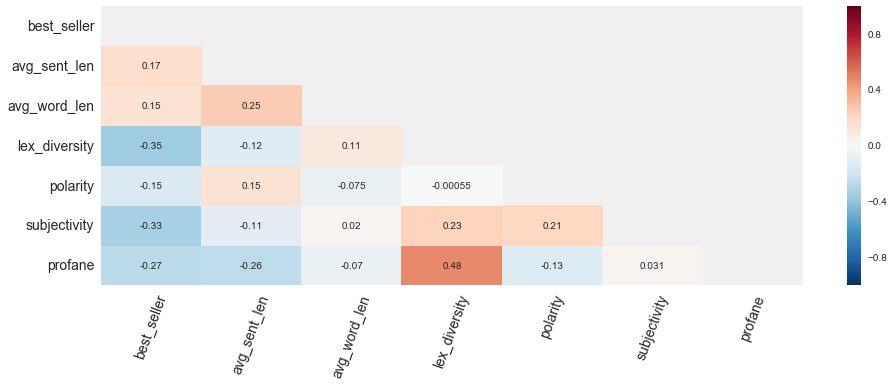

In [34]:
correlation_heat_map(sf[['best_seller','avg_sent_len','avg_word_len','lex_diversity','polarity','subjectivity','profane']].corr())

**Romance correlation**

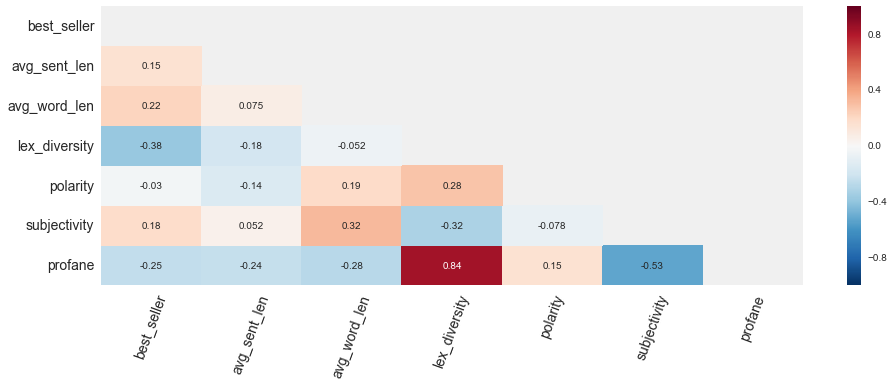

In [35]:
correlation_heat_map(rm[['best_seller','avg_sent_len','avg_word_len','lex_diversity','polarity','subjectivity','profane']].corr())

### The Metrics


<font color='crimson'>*</font> Note: Outliers have been removed in the following boxplots

**Lexical diversity** does not favor the top-sellers. Across both genres, the mean measure of flops exceeds that of the 3rd quartile value

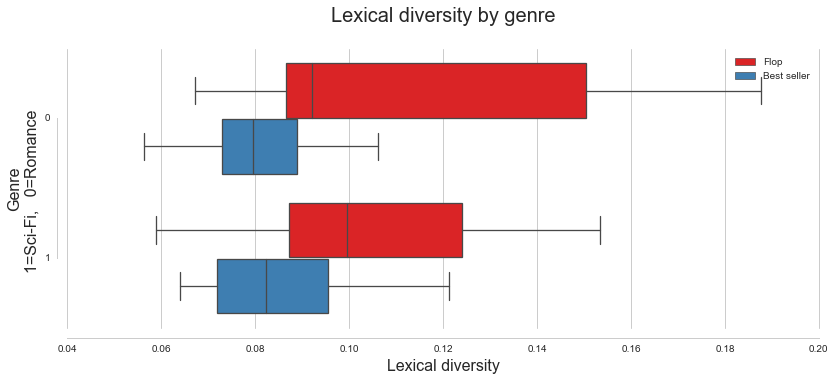

In [36]:
fig = plt.figure(figsize=(12,5))
sns.set_style("whitegrid",)
sns.boxplot(x='lex_diversity', y="sci_fi", hue="best_seller", data=df, showfliers=False, palette="Set1", orient='h',saturation=0.9,linewidth=1.3)
sns.despine(offset=10, trim=True)
plt.xlabel('Lexical diversity', fontsize = 16)
plt.ylabel('Genre\n1=Sci-Fi,   0=Romance ', fontsize = 16)
plt.title('Lexical diversity by genre\n', fontsize = 20)
l=plt.legend(loc='upper right')
l.get_texts()[0].set_text('Flop')
l.get_texts()[1].set_text('Best seller')
plt.show()

**Profanity** Having characters watch their language appears to be good for business. Both genres fared better with less profanity. And it's no surprise that romance contains saltier talk than sci-fi.

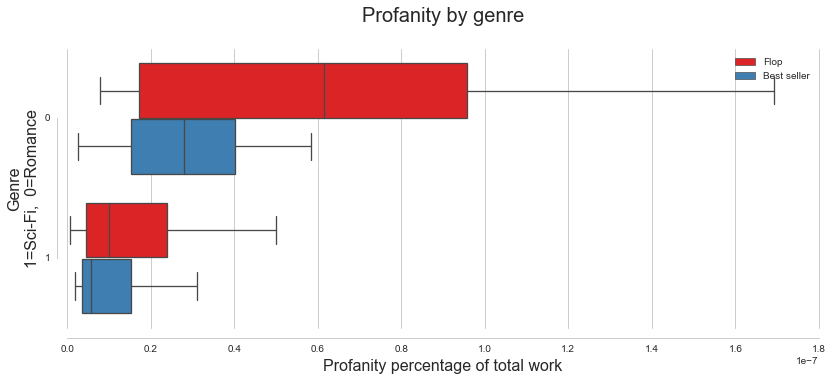

In [37]:
fig = plt.figure(figsize=(12,5))
sns.set_style("whitegrid")
sns.boxplot(x='profane', y="sci_fi", hue="best_seller", data=df,showfliers=False, palette="Set1", orient='h',saturation=.9,linewidth=1.3)
sns.despine(offset=10, trim=True)
plt.xlabel('Profanity percentage of total work', fontsize = 16)
plt.ylabel('Genre\n1=Sci-Fi,  0=Romance', fontsize = 16)
plt.title('Profanity by genre\n', fontsize = 20)
l=plt.legend(loc='upper right')
l.get_texts()[0].set_text('Flop')
l.get_texts()[1].set_text('Best seller')
plt.show()

**Subjectivity** Romance titles with a more personal point-of-view performed better, while science-fiction saw more success with objective voice.

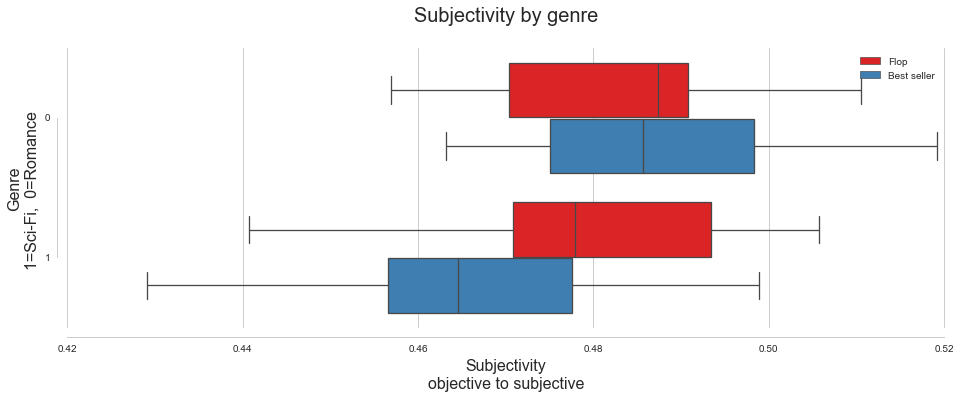

In [39]:
fig = plt.figure(figsize=(14,5))
sns.set_style("whitegrid")
sns.boxplot(x='subjectivity', y="sci_fi", hue="best_seller", data=df, showfliers=False, palette="Set1", orient='h',saturation=0.9,linewidth=1.3)
sns.despine(offset=10, trim=True)
plt.xlabel('Subjectivity\nobjective to subjective', fontsize = 16)
plt.ylabel('Genre\n1=Sci-Fi,  0=Romance ', fontsize = 16)
plt.title('Subjectivity by genre\n', fontsize = 20)
l=plt.legend(loc='upper right')
l.get_texts()[0].set_text('Flop')
l.get_texts()[1].set_text('Best seller')
plt.show()

**Polarity** is spread fairly evenly. Science-fiction favors going slightly more negative. Romance has a wider 2nd and 3rd quartile spread across best-sellers, with the median falling slightly more negative. Given that characters follow a fairly predictable arc in novels (neutral -> happy -> crisis -> happily ever after), the lack of a more widely spread positive/negative range is reasonable.

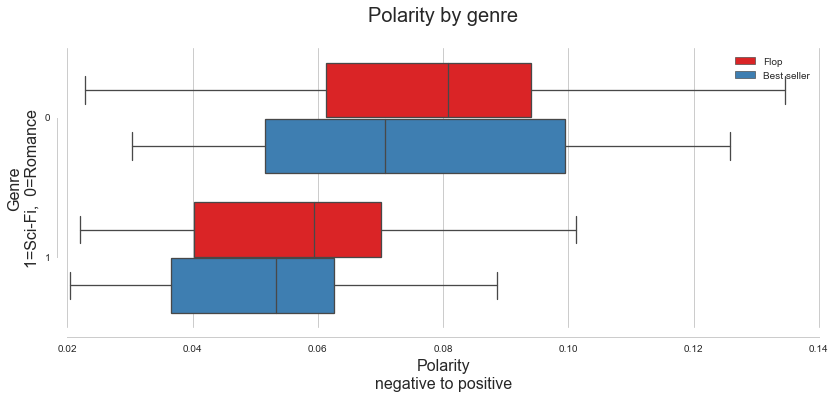

In [41]:
fig = plt.figure(figsize=(12,5))
sns.set_style("whitegrid")
sns.boxplot(x='polarity', y="sci_fi", hue="best_seller", data=df, showfliers=False, palette="Set1", orient='h',saturation=0.9,linewidth=1.3)
sns.despine(offset=10, trim=True)
plt.xlabel('Polarity\nnegative to positive', fontsize = 16)
plt.ylabel('Genre\n1=Sci-Fi,  0=Romance', fontsize = 16)
plt.title('Polarity by genre\n', fontsize = 20)
l=plt.legend(loc='upper right')
l.get_texts()[0].set_text('Flop')
l.get_texts()[1].set_text('Best seller')
plt.show()

In [54]:
import scipy.stats as stats

In [56]:
# t-test between two independent samples tell you if there is a significant
# difference between the means of the vectors

stats.ttest_ind(df[(df.best_seller == 1) & (df.sci_fi == 1)].polarity.values,
                df[(df.best_seller == 0) & (df.sci_fi == 1)].polarity.values)

Ttest_indResult(statistic=-1.0053827817576053, pvalue=0.32008831189576731)

### Verbs!

I used **TextBlob**'s part of speech tagger to create counts of adjectives, comparitive adjectives, superlative adjectives, and all your other favorite POSs. Here it would be interesting to explore more complex structural analysis using neural networks, but since we're working with the counts here, I wanted to dig into one POS more meaningfully.

I categorized each verb via **WordNet** verb lexical files and looked at their correlation to best-seller status.

#### Science-fiction verb category correlation

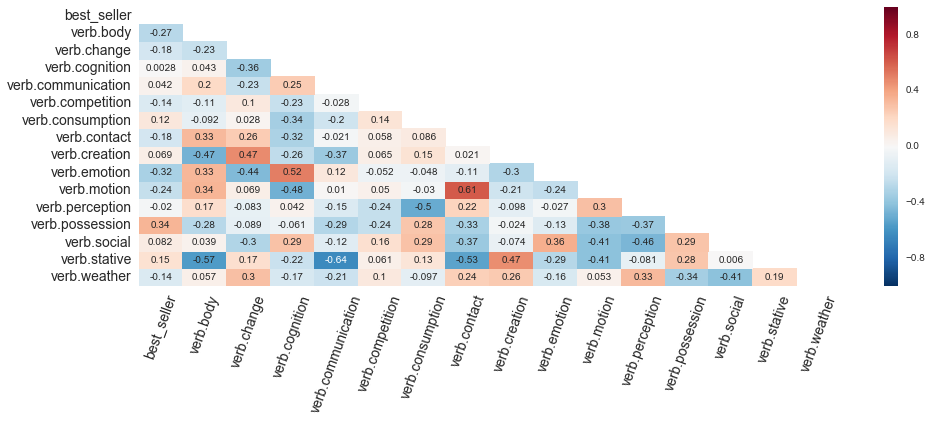

In [42]:
fields = df.columns
verb_fields = [field for field in fields if field[:5]=='verb.']
verb_fields.insert(0,'best_seller')
correlation_heat_map(sf[verb_fields].corr())

#### Romance verb category correlation

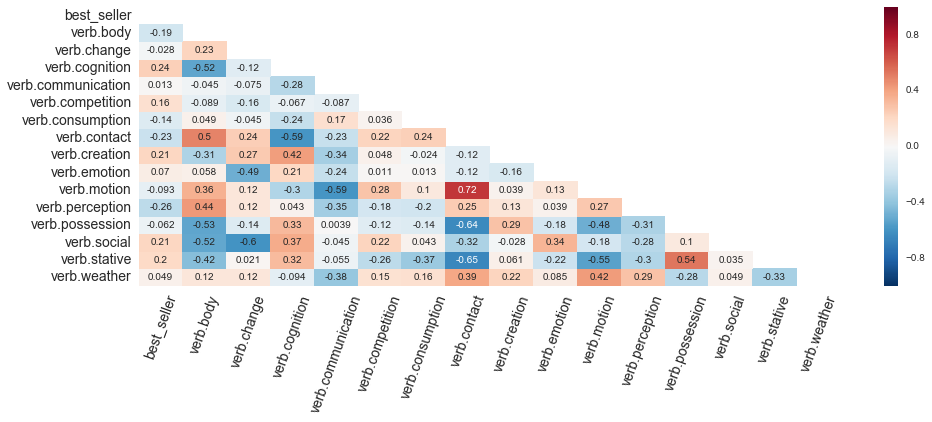

In [43]:
fields = df.columns
verb_fields = [field for field in fields if field[:5]=='verb.']
verb_fields.insert(0,'best_seller')
correlation_heat_map(rm[verb_fields].corr())

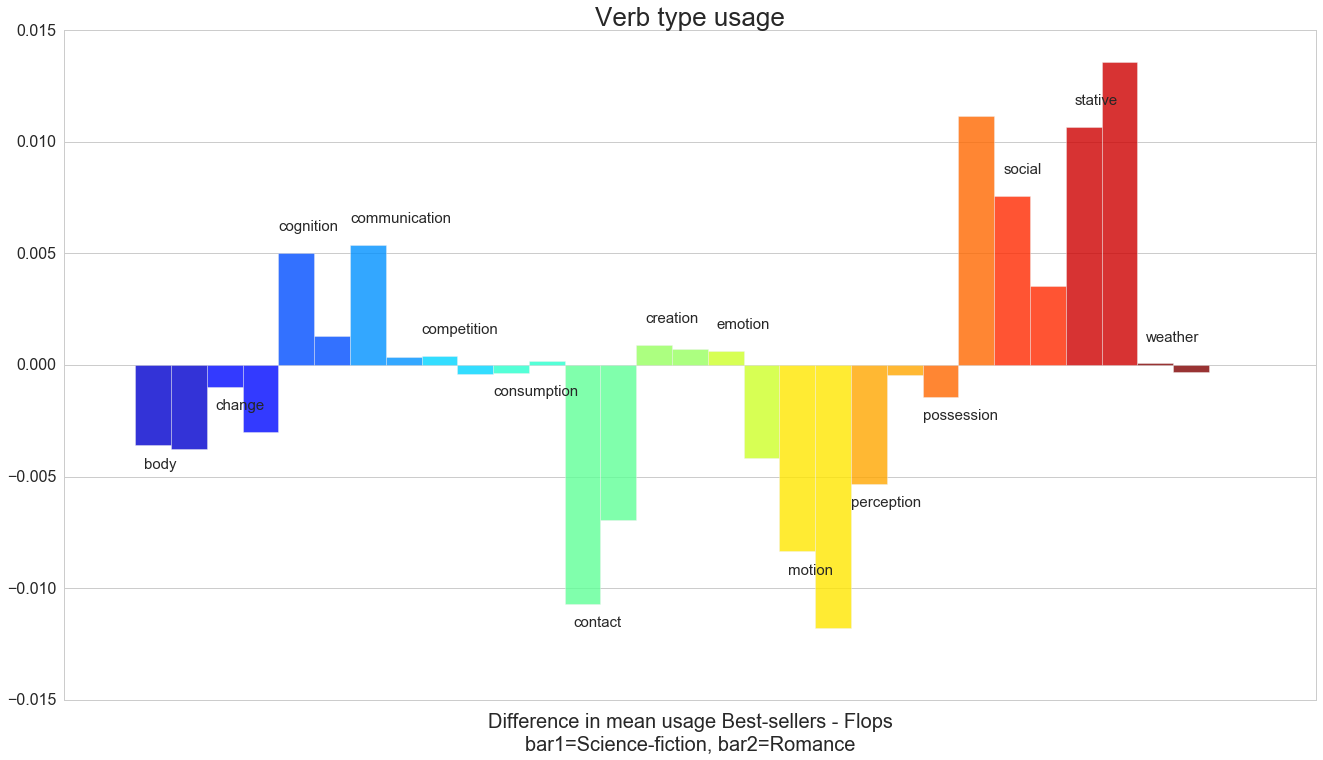

In [48]:
dfvs = pd.read_csv(path+'verb_diff.csv')

sfs = dfvs['sci_fi']==0
rms = dfvs['sci_fi']==1

fields2 = dfvs.columns
verb_fields2 = [field for field in fields if field[:5]=='verb.']
verb_fields3 = [field[5:] for field in fields if field[:5]=='verb.']
p=4
pos = 1
width = 0.4

fig = plt.figure(figsize=(20,12),facecolor='white',)
ax = fig.add_subplot(111)
ax.xaxis.grid(False)
labels=[]

i=1
for field in verb_fields2:
    f=field[5:]
    pos = p + width*i
    col = cm.jet(1.*i/len(verb_fields2))
    ax.bar(pos, dfvs[sfs][field], color=col,width=width/2,alpha=0.8)
    ax.bar(pos+.2, dfvs[rms][field], color=col,width=width/2,alpha=0.8,label=field)
    i+=1
    labels.append([pos,dfvs[sfs][field].values[0],f])


for l, label in zip(ax.patches, labels):
    if label[1]>0:
        y = label[1]+.001
    else:
        y = label[1]-.001
        
    if len(label[2])<9:
        x = label[0] + .05
    else:
        x = label[0]
    ax.annotate(label[2], xy=(x, y), fontsize=15)
    
ax.set_xlabel('Difference in mean usage Best-sellers - Flops\nbar1=Science-fiction, bar2=Romance', fontsize=20)
ax.set_title('Verb type usage',fontsize=26)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels('')

plt.show()

### Topic modeling and n_grams

<font color='crimson'> % **Retune this a bit** % </font>

I chose **TfidfVectorizer** for the 1_gram generation intending to identifying significant words common across best_sellers and flops. **LDA** for topic modeling was chosen for the same reason -- are there similar or repeated topics or subjects within each grouping?

It was my hope that n_grams and topic modeling would unveil a beautiful truth that best sellers present themes of exploration and journeying to the stars while flops are about alien-hate and interglactic corporate greed. But alas, it seems texts as varied as these are not well-suited for this stye of modeling.

Character names and dialogue "he said, she said, zorg said" were by far the most prevalent appearances. After adding these to the stop words, what was left was not significant -- as evidenced by the feature weights that all fell in the 1/100th percent range. 
*See model code and output weights in the [EDA report](https://github.com/bishopkd/DSI-SF2-bishopkd/blob/master/projects/capstone/reports/EDA.ipynb)*

Though if one were to make generalizations, 
- Romance best sellers have a high theme of body parts and I-statements: 
    - hand ~ know ~ i'm 
    - ye ~ hand ~   face
    - hand ~ didn't ~ don't
    - ye ~ hand ~ eyes
    - know ~ eyes ~ going
    - don't ~ hand ~ im
    - i'm ~ eyes ~ know
    - i'm ~ hand ~ eyes


- While their flop counterparts do not at all. I don't quite know what to make of this repeated topic: 
    - electricity ~ clucked ~ fallout


- Sci-Fi best sellers' topics revolve around time, people, and seem thoughtful 
  - steel ~ time ~ woodcarver
  - says ~ time ~ way
  - time ~ people ~ way
  - thought ~ fremen ~ man
  - know ~ time ~ people
  - time ~ people ~ way
  - dweller ~ time ~ looked


- The flops are quite similar but more "knowing" and less people focused:
  - great ~ know ~ time
  - know ~ time ~ way
  - way ~ don't ~ know
  - time ~ didn't ~ way
  - know ~ time ~ i'm


---
# The Models

## Decision Tree Classifier

Decision tree code is [here](https://github.com/bishopkd/DSI-SF2-bishopkd/blob/master/projects/capstone/reports/decision_tree_models.ipynb) 

&nbsp;
<table style="border-collapse:collapse;border-spacing:0", align='left'><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:3px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top", bgcolor='#72A6C6', width=150>Genre</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:3px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top", bgcolor='#72A6C6', width=250>Predictive accuracy</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Science-fiction</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">76%</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Romance</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">77%</td></tr></table>

**Science-fiction**
<img src="../images/DT_sf-feat.png" width="900"/>
<img src="../images/ROC_sf-dt.png" width="450"/>
**Romance**
<img src="../images/DT_rm-feat.png" width="900"/>
<img src="../images/ROC_rm-dt.png" width="450"/>


<table style="border-collapse:collapse;border-spacing:0", align='left'>    <tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:3px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top", bgcolor='#72A6C6'>Sci-fi least important features</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:3px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top", bgcolor='#72A6C6'>Romance least important features</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Comparitive adverbs</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Superlative adverbs</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Weather-related verbs</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Weather-related verbs</td></tr></table>


## Random Forest Classifier

RFC code is [here](https://github.com/bishopkd/DSI-SF2-bishopkd/blob/master/projects/capstone/reports/random_forest_models.ipynb)


<table style="border-collapse:collapse;border-spacing:0", align='left'><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:3px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top", bgcolor='#72A6C6', width=150>Genre</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:3px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top", bgcolor='#72A6C6', width=250>Predictive accuracy</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Science-fiction</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">88%</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Romance</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">80%</td></tr></table>



**Science-fiction**
<img src="../images/RF_sf-feat.png" width="900"/>
<img src="../images/ROC_sf-rfc.png" width="550"/>
**Romance**
<img src="../images/RF_rm-feat.png" width="900"/>
<img src="../images/ROC_rm-rfc.png" width="450"/>


<table style="border-collapse:collapse;border-spacing:0", align='left'><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:3px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top", bgcolor='#72A6C6'>Sci-fi least important features</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:3px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top", bgcolor='#72A6C6'>Romance least important features</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Profanity</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Profanity</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Weather-related verbs</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Average word length</td></tr></table>


##  K Nearest Neighbors classification

kNN code is [here](https://github.com/bishopkd/DSI-SF2-bishopkd/blob/master/projects/capstone/reports/knn_models.ipynb)


<table style="border-collapse:collapse;border-spacing:0", align='left'><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:3px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top", bgcolor='#72A6C6', width=150>Genre</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:3px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top", bgcolor='#72A6C6', width=250>Predictive accuracy</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Science-fiction</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">86%</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Romance</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">88%</td></tr>
<tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Combined genres</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">61%</td></tr>

</table>

<table style='border-style: hidden' >
    <tr>
        <td style='border-style: hidden'> 
            <img src="../images/ROC_sf-knn.png" width="500"/>
        </td>
        <td>
            <img src="../images/ROC_rm-knn.png" width="500"/>
        </td>
    </tr>
</table>

# Conclusion

<img src="../images/df.png" width="400"/>

 - Summarize your findings, addressing the strengths and weaknesses of your approach.
 - Recommendations and future directions.
 
 ### The future
 
 - Applications
     - Novels are difficult
     - models should be split across genres
     - Phrase overuse
     
 
 - All about me
     - Weaknesses
         - I'm a rabbit
         - Pipelines and pickling
         - More data - splitting files improved results
         - Novels not a great choice for some aspects of NLP
     - Strengths
         - 

<table style="border-collapse:collapse;border-spacing:0"><col width="160"><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:3px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal" bgcolor='#72A6C6'>Highest success predictions</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:3px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal", bgcolor='#72A6C6'>Ending sentence(s)</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Rainbow's End by Vernor Vinge</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Then he was down the elevator and back on the sunny plaza. And hovering immanent all around him were the worlds of art and science that humankind was busy building. What if I can have it all?</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">See Me by Nicolas Sparks</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">As Gabby marched through the grass, the dew moistened the tips of her toes through her sandals and the moonlight reflected on the lawn like silver trails.</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;font-weight:bold;vertical-align:top", bgcolor='#72A6C6'>Highest flop predictions</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;font-weight:bold;vertical-align:top", bgcolor='#72A6C6'>Ending sentence(s)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">Hell Ship by Philip Palmer</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;vertical-align:top">And then she burst into flame. Her body became a burning candle. And the same happened with each of the other Kaun; their bodily-energy turned on itself and their flesh became fire. And the candles burned till the flesh was all gone.</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal">Make it last by Megan Erickson</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:6px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal">I’m not saying it’s mature, but sometimes, when a guy wants a girl but knows he doesn’t have a shot? Well, he’s kind of a dick.</td></tr></table>